In [14]:
%matplotlib inline
%matplotlib ipympl
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


Завантажимо і відобразимо датасет **sunspots**:

In [15]:
df = sm.datasets.sunspots.load_pandas().data
df

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


Перетворимо дані стовбця **YEAR** у формат *datetime* і встановимо цей стовбець індексом даного датасету:

In [16]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
df.set_index('YEAR', inplace=True)


In [17]:
df

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
...,...
2004-01-01,40.4
2005-01-01,29.8
2006-01-01,15.2


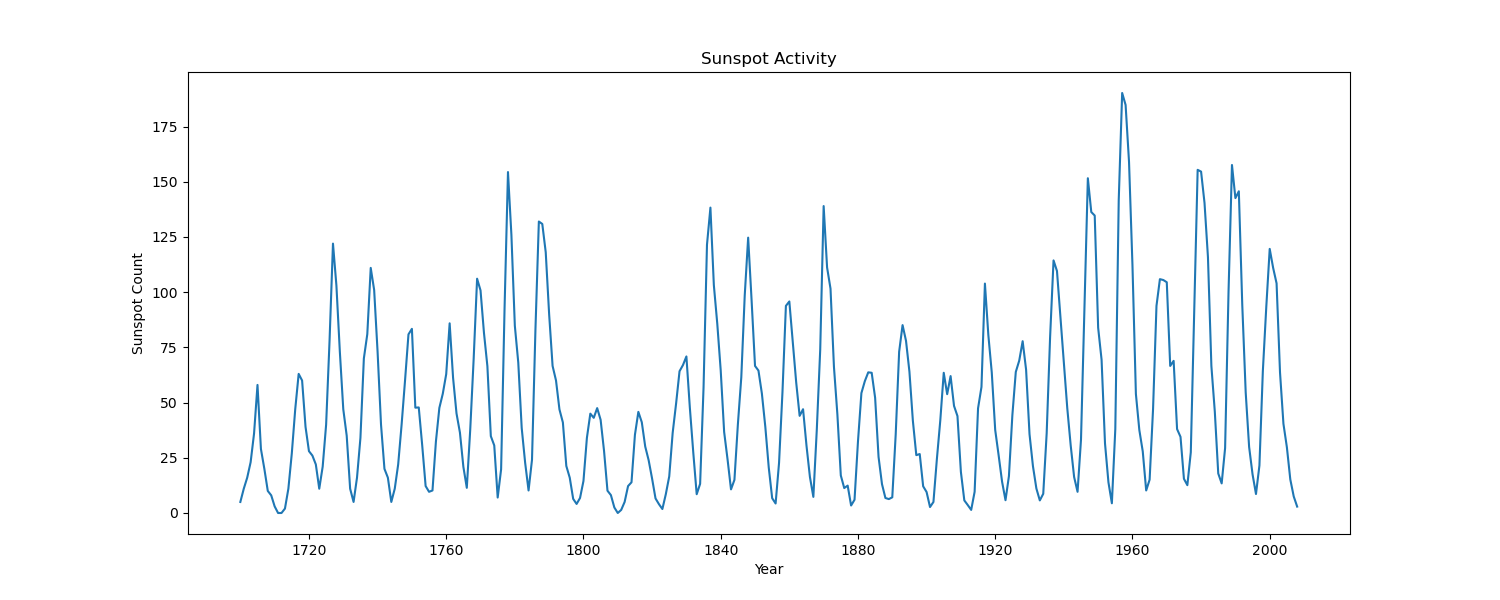

In [18]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Sunspot Count')
plt.title('Sunspot Activity')
plt.show()

Тренуємо нашу модель і будуємо прогноз на 2009 - 2030 р.р.:

In [19]:
model = ARIMA(df, order=(2,1,2))
model_fit = model.fit()

In [20]:
start = '2009-01-01'
end = '2030-01-01'
y_pred = model_fit.predict(start=start, end=end, typ='levels')
y_pred

2009-01-01    27.426505
2010-01-01    56.383319
2011-01-01    79.989969
2012-01-01    90.827969
2013-01-01    86.129968
2014-01-01    68.400237
2015-01-01    44.266135
2016-01-01    22.047135
2017-01-01     8.918870
2018-01-01     8.628290
2019-01-01    20.475890
2020-01-01    39.820667
2021-01-01    59.847756
2022-01-01    73.940272
2023-01-01    77.839285
2024-01-01    70.895973
2025-01-01    56.061085
2026-01-01    38.693367
2027-01-01    24.651250
2028-01-01    18.338663
2029-01-01    21.349343
2030-01-01    32.117631
Freq: AS-JAN, Name: predicted_mean, dtype: float64

Відобразимо графічно прогноз відносно заданого датасету:

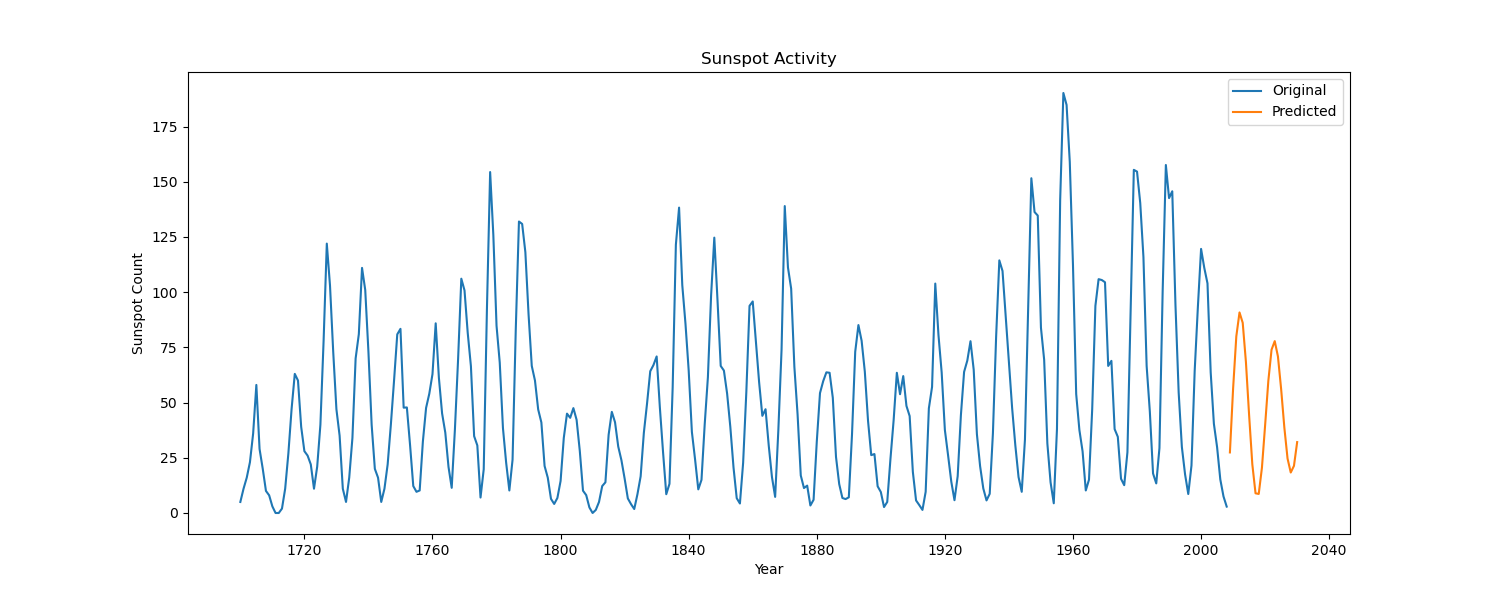

In [21]:
plt.figure(figsize=(15,6))
plt.plot(df, label='Original')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Sunspot Count')
plt.title('Sunspot Activity')
plt.legend()
plt.show()